### Capstone Lending Club Modeling

In [10]:
import pandas as pd
import numpy as np

#Resetting index due to boxing of row issues below

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)

In [11]:
train_df = pd.read_csv('train_df.csv', low_memory=False, index_col = 'index')
test_df = pd.read_csv('test_df.csv', low_memory=False, index_col = 'index')

In [12]:
holdout_df = pd.read_csv('holdout_df.csv', low_memory=False, index_col = 'index')
holdout_df = holdout_df.reset_index(drop = True)

In [13]:
holdout_df.head()

loan_amount  funded_amount  investor_funds        term  interest_rate  \
0      26400.0        26400.0         26400.0   60 months          16.01   
1      28000.0        28000.0         28000.0   60 months          25.78   
2      30000.0        30000.0         30000.0   60 months          10.42   
3       6000.0         6000.0          6000.0   36 months          13.99   
4       9600.0         9600.0          9600.0   36 months          11.53   

   installment grade sub_grade home_ownership  annual_income  \
0       642.14     C        C5           RENT        83991.0   
1       834.70     F        F5       MORTGAGE        78312.0   
2       643.63     B        B3       MORTGAGE       160000.0   
3       205.04     C        C3           RENT        44000.0   
4       316.71     B        B5       MORTGAGE        60000.0   

  verification_status   issue_d         loan_status pymnt_plan  \
0     Source Verified  Mar-2018             Current          n   
1            Verified  Sep-2015          Fully Paid          n   
2     Source Verified  Oct-2017  Late (31-120 days)          n   
3        Not Verified  Nov-2016         Charged Off          n   
4        Not Verified  Apr-2015          Fully Paid          n   

              purpose addr_state    dti  delinq_2yrs earliest_cr_line  \
0  debt_consolidation         NE  13.83          0.0         Dec-2004   
1  debt_consolidation         MD  27.12          0.0         Mar-2001   
2  debt_consolidation         NJ  39.85          0.0         Apr-2000   
3  debt_consolidation         NV  14.46          0.0         May-1991   
4  debt_consolidation         GA  27.00          0.0         Nov-1996   

   fico_range_low  fico_range_high  inq_last_6mths  open_acc  pub_rec  \
0           705.0            709.0             0.0       5.0      0.0   
1           680.0            684.0             1.0      18.0      1.0   
2           780.0            784.0             2.0      10.0      0.0   
3           670.0            674.0             3.0       7.0      1.0   
4           710.0            714.0             0.0      11.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0    10352.0        90.8       10.0                   w   22653.97   
1    20143.0        52.2       51.0                   f       0.00   
2     7177.0        15.8       31.0                   w   24322.67   
3     8872.0        74.0       16.0                   w       0.00   
4     9540.0        60.0       37.0                   f       0.00   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       22653.97   7658.720000          7658.72          3746.03   
1           0.00  38734.554956         38734.55         28000.00   
2       24322.67   8993.450000          8993.45          5677.33   
3           0.00   2853.690000          2853.69          1575.71   
4           0.00  10052.240000         10052.24          9600.00   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0        3912.69                 0.0        0.00                   0.0000   
1       10734.55                 0.0        0.00                   0.0000   
2        3316.12                 0.0        0.00                   0.0000   
3         675.07                 0.0      602.91                 108.5238   
4         452.24                 0.0        0.00                   0.0000   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  last_fico_range_high  \
0     Mar-2019           642.14           Mar-2019                 739.0   
1     Apr-2017         23790.15           Jun-2018                 724.0   
2     Dec-2018           643.63           Mar-2019                 664.0   
3     Nov-2017           205.04           Apr-2018                 499.0   
4     Sep-2015          8791.55           Mar-2019                 684.0   

   last_fico_range_low  collections_12_mths_ex_med  policy_code  \
0                735.0                         0.0          1.0   
1 

In [14]:
train_df.loan_status.value_counts()

Fully Paid            815698
Current               702673
Charged Off           206615
Late (31-120 days)     17180
In Grace Period         6738
Late (16-30 days)       3508
Default                   32
Name: loan_status, dtype: int64

In [15]:
#Checking the last payment
#train_df.last_pymnt_d.value_counts()

In [16]:
#Checking the last credit pull
#train_df.last_credit_pull_d.value_counts()

In [17]:
from datetime import datetime, timedelta

epoch = datetime(1900, 1, 1)

def timestamp_microsecond(utc_time):
    td = utc_time - epoch
    assert td.resolution == timedelta(microseconds=1)
    return (td.days * 86400 + td.seconds) * 10**6 + td.microseconds

In [18]:
train_df['earliest_cr_line_days'] = pd.to_datetime(train_df['earliest_cr_line'], format='%b-%Y').sub(epoch, axis=0) / np.timedelta64(1, 'D')
test_df['earliest_cr_line_days'] = pd.to_datetime(test_df['earliest_cr_line'], format='%b-%Y').sub(epoch, axis=0) / np.timedelta64(1, 'D')
holdout_df['earliest_cr_line_days'] = pd.to_datetime(holdout_df['earliest_cr_line'], format='%b-%Y').sub(epoch, axis=0) / np.timedelta64(1, 'D')

In [20]:
#Checking variables to drop since we need to remove all operational variables to simulate 
#an incoming loan applicant


keepers = ['loan_amount', 'emp_title',
 'emp_length_int', #transformed
 'home_ownership',
 'annual_income',
 'verification_status',
  'desc',
'region', #transformed
'income_category',
 'purpose',
 'title',
 'zip_code',
# 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line_days', #transformed
# 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
  'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
  'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
  'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bal_ex_mort',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'revol_bal_joint',
 'sec_app_fico_range_low',
 'sec_app_fico_range_high',
 'sec_app_earliest_cr_line',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_revol_util',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_mths_since_last_major_derog']


#Determining the difference in columns

a = list(holdout_df.columns)
rejects = list(set(a) - set(keepers))
rejects

['collection_recovery_fee',
 'total_rec_prncp',
 'hardship_flag',
 'total_pymnt',
 'recoveries',
 'interest_rate',
 'investor_funds',
 'total_rec_int',
 'interest_payments',
 'funded_amount',
 'sub_grade',
 'installment',
 'initial_list_status',
 'disbursement_method',
 'addr_state',
 'term',
 'loan_condition_int',
 'earliest_cr_line',
 'total_pymnt_inv',
 'loan_status',
 'grade',
 'year',
 'policy_code',
 'out_prncp_inv',
 'issue_d',
 'total_rec_late_fee',
 'last_pymnt_d',
 'out_prncp',
 'pymnt_plan',
 'last_pymnt_amnt',
 'debt_settlement_flag',
 'last_credit_pull_d']

In [21]:
#| (train_df['region']=='West') 

# Train set (Normal training dataset)
X_train = train_df[(train_df['loan_status'] != 'Current')].drop(rejects, axis = 1)
y_train = train_df[(train_df['loan_status'] != 'Current')]['loan_condition_int']


# Test Dataset
X_test = test_df[(test_df['loan_status'] != 'Current')].drop(rejects, axis = 1)
y_test = test_df[(test_df['loan_status'] != 'Current')]['loan_condition_int']

#Holdout Dataset
X_holdout = holdout_df[(holdout_df['loan_status'] != 'Current')].drop(rejects, axis = 1)
y_holdout = holdout_df[(holdout_df['loan_status'] != 'Current')]['loan_condition_int']



In [32]:
#Saving for Dashboard
X_holdout_untransformed = X_holdout.copy()

In [0]:
print(len(keepers))
print(X_holdout.shape)
print(holdout_df.shape)
holdout_cols = X_holdout.columns

101
(26249, 62)
(43812, 94)


In [0]:
holdout_cols

Index(['loan_amount', 'home_ownership', 'annual_income', 'verification_status',
       'purpose', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',

In [0]:
print ('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('X_holdout shape:', X_holdout.shape)

X_train shape: (1049771, 62)
X_test shape: (236219, 62)
X_holdout shape: (26249, 62)


In [0]:
list(set(X_train.columns) - set(X_holdout.columns))

[]

In [0]:
list(set(X_train.columns) - set(X_test.columns))

[]

In [0]:
list(set(X_test.columns) - set(X_holdout.columns))

[]

In [0]:
list(set(X_test.columns) - set(X_train.columns))

[]

### Data Prep For ML Pipeline (One-Hot Vectors For Categorical Variables, and Scaled Continuous Variables)

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [39]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler

# Columns to delete or fix: earliest_cr_line, last_pymnt_d, next_pymnt_d, last_credit_pull_d, verification_status_joint

numeric = X_train.select_dtypes(exclude=["object"])
categorical = X_train.select_dtypes(["object"])

numeric_pipeline = Pipeline([
    ('selector', DataFrameSelector(numeric.columns.tolist())),
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('selector', DataFrameSelector(categorical.columns.tolist())), # We will have to write the categorical columns manually and see if it works.
    ('encoder', CategoricalEncoder(encoding="onehot-dense")),
])

# Combine both Pipelines into one array
combined_pipeline = FeatureUnion(transformer_list=[
    ('numeric_pipeline', numeric_pipeline),
    ('categorical_pipeline', categorical_pipeline)
])

In [40]:
import gc
gc.collect()
X_train = combined_pipeline.fit_transform(X_train)

In [41]:
gc.collect()

X_test=combined_pipeline.transform(X_test)

In [42]:
gc.collect()

X_holdout=combined_pipeline.transform(X_holdout)

In [43]:
print (X_train.shape, X_test.shape, X_holdout.shape)

(1049771, 89) (236219, 89) (26249, 89)


### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', random_state=42, penalty='l1', max_iter=300)
# log_reg_sm = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
from sklearn.metrics import accuracy_score, roc_auc_score

normal_ypred = log_reg.predict(X_test)

In [46]:
print(accuracy_score(y_test, normal_ypred))

0.8966255889661712


In [47]:
print(roc_auc_score(y_test, normal_ypred))

0.8234928279558209


In [48]:
log_reg.coef_.shape, log_reg.n_iter_ 

((1, 89), array([16], dtype=int32))

In [49]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y_test, log_reg.predict_proba(X_test))
plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


<Figure size 640x480 with 1 Axes>

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, normal_ypred)

array([[179119,  10604],
       [ 13815,  32681]])

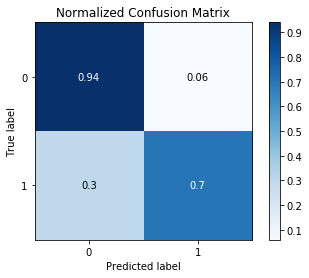

In [51]:
skplt.metrics.plot_confusion_matrix(y_test, normal_ypred, normalize=True)
plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


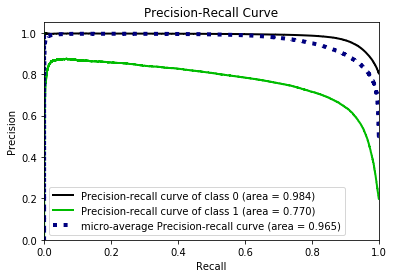

In [52]:
skplt.metrics.plot_precision_recall_curve(y_test, log_reg.predict_proba(X_test))

# PCA (Principal Component Analysis - Dimensionality reduction)

In [121]:
import datetime
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [54]:
from sklearn.decomposition import PCA
pca = PCA() 
pca.fit(X_train) 
cumsum = np.cumsum(pca.explained_variance_ratio_) 
d = np.argmax(cumsum >= 0.95) + 1

In [55]:
print('Number of principal components needed to explain 95% of the variance:', d)

Number of principal components needed to explain 95% of the variance: 41


In [56]:
pca = PCA(n_components=d)
start_tm=datetime.datetime.now()
pca.fit(X_train)
end_tm=datetime.datetime.now()
print ('Time taken to determine the top',d,' PCAs (on Training dataset) is',end_tm - start_tm)
X_trans_train = pca.fit_transform(X_train)
X_trans_test = pca.transform(X_test)
X_trans_holdout = pca.transform(X_holdout)

Time taken to determine the top 41  PCAs (on Training dataset) is 0:00:16.150861


In [57]:
# print(pca.explained_variance_ratio_)
# print('The first',d, 'PCs explain about',pca.explained_variance_ratio_.sum(),'% variability in the data')


In [58]:
pca.components_.shape

(41, 89)

In [59]:
X_train.shape

(1049771, 89)

In [60]:
pc_list = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 
           'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 
           'pc11', 'pc12', 'pc13', 'pc14', 'pc15',
           'pc16', 'pc17', 'pc18', 'pc19', 'pc20',
           'pc21', 'pc22', 'pc23', 'pc24', 'pc25', 
           'pc26', 'pc27', 'pc28', 'pc29', 'pc30', 
           'pc31', 'pc32', 'pc33', 'pc34', 'pc35',
           'pc36', 'pc37', 'pc38', 'pc39', 'pc40',
           'pc41']#, 'pc42', 'pc43', 'pc44', 'pc45', 
           #'pc46', 'pc47']#, 'pc48', 'pc49', 'pc50', 
           #'pc51']    

In [0]:
# # number of components
# n_pcs= pca.components_.shape[0]

# # get the index of the most important feature on EACH component i.e. largest absolute value
# # using LIST COMPREHENSION HERE
# most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

# initial_feature_names = feature_name_list

# # get the names
# most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# # using LIST COMPREHENSION HERE AGAIN
# dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# # build the dataframe
# df = pd.DataFrame(sorted(dic.items()))
# df

In [61]:
PCA_Df = pd.DataFrame(data = X_trans_train
             , columns = pc_list)

In [0]:

# PCA_Df = pd.DataFrame(data = X_trans_train
# , columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10', 'pc11', 'pc12', 'pc13', 'pc14', 'pc15'])


# yc=train_df.loc[(train_df['region']=='SouthWest') & (train_df['loan_status'] != 'Current')]


# yc.reset_index(drop=True, inplace=True)
# PCA_Df.reset_index(drop=True, inplace=True)

# PCA_Df_tgt = pd.concat([PCA_Df, yc[['loan_condition_int', 'home_ownership', 'fico_range_low', 'fico_range_high']]], axis = 1)



# PCA_Df_tgt.groupby(['fico_range_high'])['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10'
# ,'pc11', 'pc12', 'pc13', 'pc14', 'pc15'].mean()


In [62]:
yc=train_df.loc[(train_df['region']=='SouthWest') & (train_df['loan_status'] != 'Current')]
#yc=train_df.loc[train_df['loan_status'] != 'Current']

In [63]:
yc.reset_index(drop=True, inplace=True)
PCA_Df.reset_index(drop=True, inplace=True)

PCA_Df_tgt = pd.concat([PCA_Df, yc[['loan_condition_int']]], axis = 1)

In [0]:
# yc.reset_index(drop=True, inplace=True)
# PCA_Df.reset_index(drop=True, inplace=True)

# PCA_Df_tgt = pd.concat([PCA_Df, yc[['loan_condition_int', 'home_ownership', 'fico_range_low', 'fico_range_high']]], axis = 1)



# PCA_Df_tgt.groupby(['home_ownership'])[pc_list].mean()


In [64]:
PCA_Df_tgt.head(5)

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0 -0.850243 -0.686537  0.569272  1.582089  1.679224 -0.821669  0.083664   
1  1.575303 -0.912765 -3.370272  1.000707  0.033426 -0.883249 -0.948656   
2  3.186995  2.286564 -3.697124 -1.238402  0.555275  0.041031  0.973876   
3 -2.911482  1.889450  0.924851  3.415340  2.652654 -0.882384  1.080678   
4  0.056847  3.075477 -3.011083 -0.842384  0.104296 -2.064490  1.797196   

        pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0 -0.476762 -0.486414  0.625089 -1.499157 -1.013746 -0.152025 -0.020149   
1 -0.151396  0.829941  1.181090 -0.332553 -1.300039 -0.095605  0.002537   
2 -0.327482 -1.875344 -0.684025 -0.136894 -0.032832  0.253906 -0.864360   
3 -0.005830  0.905621 -0.197638  0.062310  2.228176 -0.417304  2.605568   
4  0.174907 -1.177261 -0.221580 -1.208044 -0.117417  0.239679 -1.246405   

       pc15      pc16      pc17      pc18      pc19      pc20      pc21  \
0 -0.082639  0.453438  0.012638 -0.152194  0.942505  0.350255 -0.659516   
1  0.033338  0.247200 -0.011492 -0.256297  1.086164 -0.152755  0.449293   
2 -0.007041 -0.156786 -0.470048  0.827903 -1.708406  0.649223 -0.611322   
3 -0.563103 -0.775503 -0.017636 -0.423574  0.274450 -0.298318 -0.353316   
4  0.455131  0.141372 -0.625706  0.809708 -1.564443  0.841839 -0.726487   

       pc22      pc23      pc24      pc25      pc26      pc27      pc28  \
0  0.209804  0.157358  0.030583  0.075260  0.395698 -0.500757  0.686491   
1 -0.017026 -0.034213 -1.267761  0.099689 -0.965905 -0.466371  0.238690   
2  0.877523 -0.523931  0.516264 -0.054262  0.959578  0.404575  0.372762   
3 -0.302895 -0.252946  0.617455  0.153148 -0.241959 -1.487756  0.067875   
4 -0.100920  0.271386 -0.632073 -0.073751  1.679070  0.934818  1.261236   

       pc29      pc30      pc31      pc32      pc33      pc34      pc35  \
0 -0.697858 -0.875015  0.206242 -0.472315  0.591595  0.444650  0.559475   
1 -0.072077 -0.335210  0.270234 -0.371404  0.049555  0.075314 -0.791180   
2  0.192258  0.021216  0.042768  0.083347  0.769500 -0.063296  0.142926   
3  1.784122  0.969391 -1.325641 -1.188560  0.477313 -0.735356  0.691552   
4  0.691215  0.625176 -0.515642  0.037363  0.446301  0.564022  0.100644   

       pc36      pc37      pc38      pc39      pc40      pc41  \
0  0.529518 -0.754386  0.391483 -0.080799  0.871040  0.036922   
1 -0.042375  0.113513 -0.623163 -0.633763  0.204840  0.228366   
2 -0.960222 -0.067954 -0.142688 -0.020438  0.557395 -0.219709   
3 -0.914856 -0.609751 -0.501411 -0.900560 -0.064058 -0.050787   
4  0.454960  0.030764  0.682988 -0.065838 -0.230373  0.267684   

   loan_condition_int  
0                 0.0  
1                 0.0  
2                 0.0  
3                 1.0  
4                 0.0

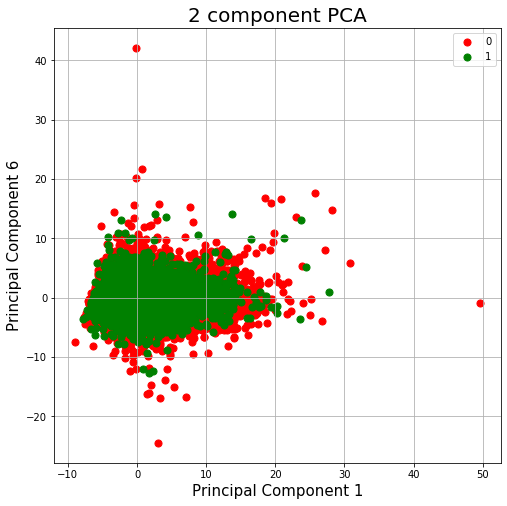

In [65]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 6', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = PCA_Df_tgt['loan_condition_int'] == target
    ax.scatter(PCA_Df_tgt.loc[indicesToKeep, 'pc1']
               , PCA_Df_tgt.loc[indicesToKeep, 'pc6']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [0]:
#plt.scatter(X_trans_train[:, 0], X_trans_train[:, 1],
#            c=y_train, edgecolor='none', alpha=0.5,
#            cmap=plt.cm.get_cmap('rainbow', 10))
#plt.xlabel('component 1')
#plt.ylabel('component 2')
#plt.colorbar();

In [0]:
import seaborn as sns
sns.set(style="ticks")

In [0]:
#sns.pairplot(PCA_Df_tgt, hue="loan_condition_int")

# LDA (Linear Discriminant Analysis)

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [0]:
lda=LinearDiscriminantAnalysis(n_components=2)

In [0]:
lda_xform=lda.fit(X_train, y_train)

C:\Users\rrajs\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(89, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\rrajs\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)
C:\Users\rrajs\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [0]:
lda_xform=lda.transform(X_train)

In [0]:
print(lda.explained_variance_ratio_)

[1.]


In [0]:
label_dict = {0: 'Good Loan', 1: 'Bad Loan'}

# Logistic Regression with PCA

In [66]:
from sklearn.linear_model import LogisticRegression
log_reg_pca = LogisticRegression(solver='liblinear', random_state=42, penalty='l1', max_iter=5)

log_reg_pca.fit(X_trans_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_test_pred_logregpca = log_reg_pca.predict(X_trans_test)

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred_logregpca)

array([[180503,   9220],
       [ 15849,  30647]])

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


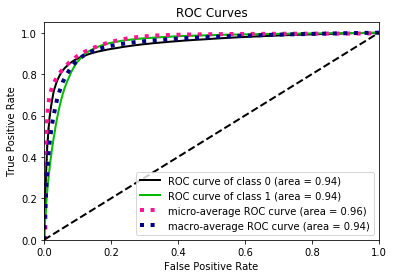

In [69]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y_test, log_reg_pca.predict_proba(X_trans_test))
plt.show()

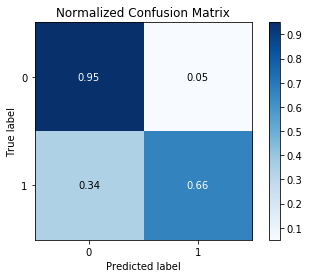

In [70]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_logregpca, normalize=True)
plt.rcParams['figure.figsize'] = (10, 4)
plt.show()

In [71]:
log_reg_pca.coef_.shape

(1, 41)

In [72]:
print(accuracy_score(y_test, y_test_pred_logregpca))

0.8938739051473421


/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


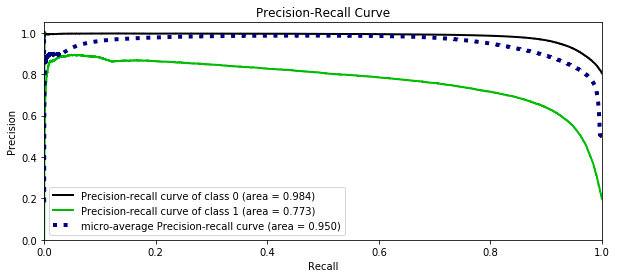

In [73]:
skplt.metrics.plot_precision_recall_curve(y_test, log_reg_pca.predict_proba(X_trans_test))

# K-Means Clustering

In [74]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_trans_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [75]:
y_train_arr=np.array(y_train)
y_test_arr=np.array(y_test)

In [76]:
correct = 0
y_test_pred_Kmeans = []
for i in range(len(X_trans_test)):
    predict_me = np.array(X_trans_test[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    y_test_pred_Kmeans = np.append(y_test_pred_Kmeans, prediction)
    if prediction[0] == y_test_arr[i]:
        correct += 1

print(correct/len(X_trans_test))

0.5994776034103946


In [77]:
y_test_pred_Kmeans.shape

(236219,)

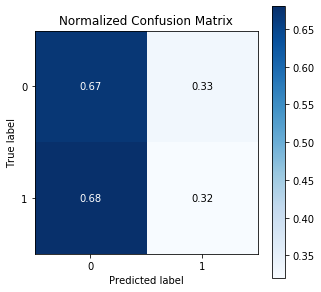

In [205]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_Kmeans, normalize=True)
plt.rcParams['figure.figsize'] = (10, 4)
plt.show()

# Random Forest Classifier

In [78]:
Rand_clf = RandomForestClassifier(random_state=42)
start_tm=datetime.datetime.now()
Rand_clf.fit(X_trans_train, y_train)
end_tm=datetime.datetime.now()
print ("Time taken to fit the Random Forest Classifier model on Reduced dataset is ",end_tm - start_tm)
y_test_pred_randclf = Rand_clf.predict(X_trans_test)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Time taken to fit the Random Forest Classifier model on Reduced dataset is  0:02:15.585122


In [79]:
print ('F1 Score = ',f1_score(y_test, y_test_pred_randclf, average="macro"))
print ('Precision Score = ',precision_score(y_test, y_test_pred_randclf, average='macro'))
print ('Recall Score = ',recall_score(y_test, y_test_pred_randclf, average='macro'))

F1 Score =  0.7778522327946706
Precision Score =  0.8192952146680608
Recall Score =  0.7515941284598713


In [80]:
conf_mx = confusion_matrix(y_test, y_test_pred_randclf)

In [81]:
conf_mx

array([[180845,   8878],
       [ 20924,  25572]])

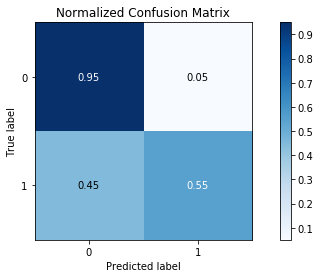

In [82]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_randclf, normalize=True)
plt.rcParams['figure.figsize'] = (10, 4)
plt.show()

# XGBoost Classifier

In [128]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

RANDOM_SEED = 42

<b>Don't run the GridSearch Steps Unless You Have 8 Hours To Kill</b><br>
GridSearch will be ran to find the optimal settings for the hyperparameters. However once complete the values will be hard coded due to the amount of time it takes to run GridSearch on this dataset.

In [129]:
#Checking for optimal number of trees (Heed Time Commitment Warning)

param_grid = {'n_estimators':range(5,200,10)}

model = XGBClassifier(learning_rate =0.1, 
                      n_estimators=140, 
                      max_depth=5,
                      min_child_weight=1, 
                      gamma=0, 
                      subsample=0.8, #lower value minimizes overfitting 0.5-1
                      reg_lambda = 1, #L2 regularization
                      colsample_bytree=0.8, #typical values 0.5-1
                      n_jobs=2, #this determines the number of CPU cores to parallel process on. A value of -1 selects all of them (not recommended for long training events)
                      scale_pos_weight=1,
                      random_state=RANDOM_SEED,
                      silent = 1)



grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', n_jobs=2, verbose=1, cv = 5)
grid.fit(X_trans_train, y_train)

print(grid.best_score_)
print(grid.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 41.5min
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed: 190.2min finished


-0.10479904664922159
{'n_estimators': 195}


In [130]:
n_est_model = grid.best_params_['n_estimators'] #Result 195

In [ ]:
#Hard coded tuning output from above step

n_est_model = 195

In [131]:
#Checking max_depth and min_child_weight (Heed Time Commitment Warning)


param_grid1 = {'max_depth':range(3,10,2),
               'min_child_weight':range(1,6,2),
               }

model = XGBClassifier(learning_rate =0.1, 
                      n_estimators=n_est_model, 
                      max_depth=5,
                      min_child_weight=1, 
                      gamma=0, 
                      subsample=0.8, #lower value minimizes overfitting 0.5-1
                      reg_lambda = 1, #L2 regularization
                      colsample_bytree=0.8, #typical values 0.5-1
                      n_jobs=2, 
                      scale_pos_weight=1,
                      random_state=RANDOM_SEED,
                      silent = 1)



grid1 = GridSearchCV(estimator=model, param_grid=param_grid1, scoring='neg_mean_absolute_error', n_jobs=2, verbose=1, cv = 5)
grid1.fit(X_trans_train, y_train)

print(grid1.best_score_)
print(grid1.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 114.1min
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed: 173.9min finished


-0.10383597946599782
{'max_depth': 9, 'min_child_weight': 3}


In [132]:
max_depth_model = grid1.best_params_['max_depth'] #Result 9
min_child_weight_model = grid1.best_params_['min_child_weight'] #Result 3

In [ ]:
#Hard coded tuning output from above step

max_depth_model = 9
min_child_weight_model = 3

In [135]:
#Fine tuning max_depth and min_child_weight based on previous best parameters (Heed Time Commitment Warning)


param_grid2 = {'max_depth':[grid1.best_params_['max_depth']-1,grid1.best_params_['max_depth'],grid1.best_params_['max_depth']+1],
               'min_child_weight':[grid1.best_params_['min_child_weight']-1,grid1.best_params_['min_child_weight'],grid1.best_params_['min_child_weight']+1],
               }

model = XGBClassifier(learning_rate =0.1, 
                      n_estimators=n_est_model, 
                      max_depth=5,
                      min_child_weight=1, 
                      gamma=0, 
                      subsample=0.8, #lower value minimizes overfitting 0.5-1
                      reg_lambda = 1, #L2 regularization
                      colsample_bytree=0.8, #typical values 0.5-1
                      n_jobs=2, 
                      scale_pos_weight=1,
                      random_state=RANDOM_SEED,
                      silent = 1)



grid2 = GridSearchCV(estimator=model, param_grid=param_grid2, scoring='neg_mean_absolute_error', n_jobs=2, verbose=1, cv = 5)
grid2.fit(X_trans_train, y_train)

print(grid2.best_score_)
print(grid2.best_params_)

In [ ]:
max_depth_model2 = grid2.best_params_['max_depth'] #Result (did not complete)
min_child_weight_model2 = grid2.best_params_['min_child_weight'] #Result (did not complete)


In [136]:
#Hard coded tuning output from 2 steps above 

max_depth_model2 = 9
min_child_weight_model2 = 3

In [138]:
#Tuning reg_alpha based on previous best parameters (Heed Time Commitment Warning)


param_grid3 = {'reg_alpha':[1e-5, 1e-2, 0.1, 0.5, 1, 5, 10, 50, 100]}

#[1e-5, 1e-2, 0.1, 1, 100]

model = XGBClassifier(learning_rate =0.1, 
                      n_estimators=n_est_model, 
                      max_depth=max_depth_model2,
                      min_child_weight=min_child_weight_model2, 
                      gamma=0, 
                      subsample=0.7, #lower value minimizes overfitting 0.5-1
                      reg_lambda = 1, #L2 regularization
                      colsample_bytree=0.8, #typical values 0.5-1
                      n_jobs=2, 
                      scale_pos_weight=1,
                      random_state=RANDOM_SEED,
                      silent = 1)



grid3 = GridSearchCV(estimator=model, param_grid=param_grid3, scoring='neg_mean_absolute_error', n_jobs=2, verbose=1, cv = 3)
grid3.fit(X_trans_train, y_train)

print(grid3.best_score_)
print(grid3.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  27 out of  27 | elapsed: 140.8min finished


-0.10353496143444618
{'reg_alpha': 10}


In [139]:
reg_alpha_model = grid3.best_params_['reg_alpha'] #Result 10

In [ ]:
#Hard coded tuning output from above step

reg_alpha_model = 10

In [140]:
#Tuning reg_lambda based on previous best parameters (Heed Time Commitment Warning)


param_grid4 = {'reg_lambda':[1e-5, 1e-2, 0.1, 0.5, 1, 5, 10, 50, 100]}

#range(0,100,1)

model = XGBClassifier(learning_rate =0.1, 
                      n_estimators=n_est_model, 
                      max_depth=max_depth_model2,
                      min_child_weight=min_child_weight_model2, 
                      gamma=0, 
                      subsample=0.7, #lower value minimizes overfitting 0.5-1
                      reg_alpha = reg_alpha_model,
                      reg_lambda = 1, #L2 regularization
                      colsample_bytree=0.8, #typical values 0.5-1
                      n_jobs=2, 
                      scale_pos_weight=1,
                      random_state=RANDOM_SEED,
                      silent = 1)



grid4 = GridSearchCV(estimator=model, param_grid=param_grid4, scoring='neg_mean_absolute_error', n_jobs=2, verbose=1, cv = 3)
grid4.fit(X_trans_train, y_train)

print(grid4.best_score_)
print(grid4.best_params_)



Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  27 out of  27 | elapsed: 143.3min finished


-0.10351209930546758
{'reg_lambda': 5}


In [141]:
reg_lambda_model = grid4.best_params_['reg_lambda'] #Results 5


In [ ]:
#Hard coded tuning output from above step

reg_lambda_model = 5

In [142]:
gc.collect()
tuned_xgb_clf = XGBClassifier(learning_rate =0.1, 
                      n_estimators=n_est_model, 
                      max_depth=max_depth_model2,
                      min_child_weight=min_child_weight_model2, 
                      gamma=0, 
                      subsample=0.7, #lower value minimizes overfitting 0.5-1
                      reg_alpha = reg_alpha_model,
                      reg_lambda = reg_lambda_model, #L2 regularization
                      colsample_bytree=0.8, #typical values 0.5-1
                      n_jobs=2, 
                      scale_pos_weight=1,
                      random_state=RANDOM_SEED,
                      silent = 1)

tuned_xgb_clf.fit(X_trans_train,  y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=None, n_estimators=195, n_jobs=2,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=10, reg_lambda=5, scale_pos_weight=1, seed=None,
              silent=1, subsample=0.7, verbosity=1)

In [143]:
y_test_pred_tuned_xgb = tuned_xgb_clf.predict(X_trans_test)


In [144]:
xgb_clf = XGBClassifier(learning_rate = 0.1, random_state=RANDOM_SEED, n_estimators=300,n_jobs=-1)
xgb_clf.fit(X_trans_train,  y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [145]:
y_test_pred_xgb = xgb_clf.predict(X_trans_test)

In [146]:
#Comparing default XGBClassifier to Tuned version
print('Tuned:',accuracy_score(y_test, y_test_pred_tuned_xgb))
print('Default:', accuracy_score(y_test,y_test_pred_xgb))

Tuned: 0.8984120667685496
Default: 0.8947163437318759


In [194]:
print(roc_auc_score(y_test, y_test_pred_tuned_xgb))

0.8387306299200777


In [147]:
print(xgb_clf.feature_importances_)

[0.00496562 0.11726448 0.05817966 0.01025134 0.05911617 0.01204943
 0.08279263 0.01080141 0.07898349 0.20198208 0.0533476  0.09615922
 0.01881187 0.00380621 0.00366159 0.00829666 0.00954256 0.04509183
 0.00440492 0.00195484 0.00730824 0.00931895 0.02237288 0.01066397
 0.00383849 0.01766783 0.00241369 0.01287663 0.         0.
 0.         0.0058127  0.00522824 0.         0.00485833 0.00682048
 0.         0.         0.00547364 0.         0.00388223]


In [ ]:
#xgb_fea_imp=pd.DataFrame(list(xgb_clf.get_booster().get_fscore().items()),
#columns=['feature','importance']).sort_values('importance', ascending=False)

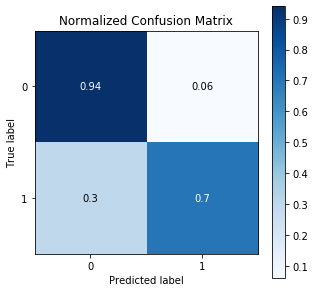

In [155]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_xgb, normalize=True)
plt.rcParams['figure.figsize'] = (5,5)
plt.show()

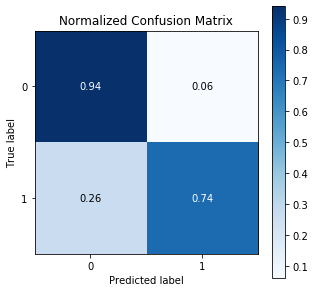

In [156]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_tuned_xgb, normalize=True)
plt.rcParams['figure.figsize'] = (5, 5)
plt.show()

In [95]:
# install graphviz on your PC or mac
# graphviz.gitlab.io/_pages/Download/Download_windows.html
# and set the path to the bin location
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [119]:
# xgb.plot_tree(xgb_clf,num_trees=1)
# plt.rcParams['figure.figsize'] = [30, 30]
# plt.savefig('xgb_plt_tree.png')
# plt.show()

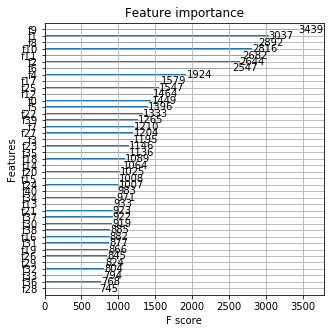

In [148]:
xgb.plot_importance(tuned_xgb_clf)
plt.rcParams['figure.figsize'] = [50, 50]
plt.savefig('tuned_xgb_plt_importance.png')
plt.show()

# K-Nearest Neighbors

In [97]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.model_selection import GridSearchCV
#nca = NeighborhoodComponentsAnalysis(random_state=42)

In [108]:
# Train Dataset
X_train_knn = train_df[(train_df['region']=='SouthWest') & (train_df['loan_status'] != 'Current')].drop(rejects, axis = 1)
y_train_knn = train_df[(train_df['region']=='SouthWest') & (train_df['loan_status'] != 'Current')]['loan_condition_int']

In [109]:
# Test Dataset
X_test_knn = test_df[(test_df['region']=='SouthWest') & (test_df['loan_status'] != 'Current')].drop(rejects, axis = 1)
y_test_knn = test_df[(test_df['region']=='SouthWest') & (test_df['loan_status'] != 'Current')]['loan_condition_int']

In [110]:
gc.collect()
X_trans_train_knn = combined_pipeline.fit_transform(X_train_knn)
X_trans_test_knn = combined_pipeline.transform(X_test_knn)

In [111]:
kNN.fit(X_trans_train_knn, y_train_knn)

start_tm=datetime.datetime.now()
y_test_pred_knn= kNN.predict(X_trans_test_knn)
end_tm=datetime.datetime.now()

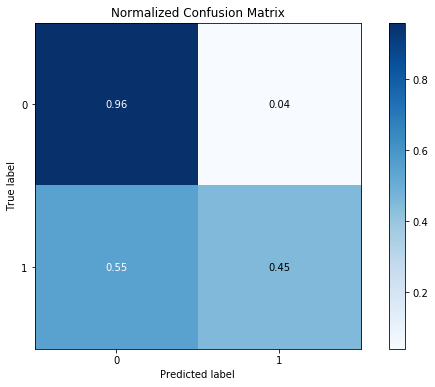

In [112]:
skplt.metrics.plot_confusion_matrix(y_test_knn, y_test_pred_knn, normalize=True)
plt.rcParams['figure.figsize'] = (5, 5)
plt.show()

In [113]:
print ("Time taken to run predictions on Testing dataset is ",end_tm - start_tm)

print ("Accuracy Score : K-nearest neighbors = ", accuracy_score(y_test_knn, y_test_pred_knn))

print ("No. of Correct Predictions : K-nearest neighbors = ", (y_test_knn == y_test_pred_knn).value_counts()[1])

print ("RMSE : Ensemble = ", np.sqrt(mean_squared_error(y_test_knn, y_test_pred_knn)))

Time taken to run predictions on Testing dataset is  0:10:21.092423
Accuracy Score : K-nearest neighbors =  0.8631924096553648
No. of Correct Predictions : K-nearest neighbors =  24746
RMSE : Ensemble =  0.36987510100659


# Ensemble Learning

In [98]:
from sklearn.ensemble import VotingClassifier

#### Test Set

In [157]:
en_clf = VotingClassifier(estimators=[('lr', log_reg_pca), ('rc', Rand_clf), ('xgb_tuned', tuned_xgb_clf)], voting='soft') #('knn', kNN)]

In [158]:
en_clf.fit(X_trans_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=5,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l1',
                                                 random_state=42,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rc',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini'...
                                        

In [159]:
y_test_pred_ensm= en_clf.predict(X_trans_test)
#y_test_pred_ensm = en_clf.predict_proba(X_trans_test)

In [160]:
print ("Accuracy Score : Ensemble = ", accuracy_score(y_test, y_test_pred_ensm))

Accuracy Score : Ensemble =  0.8958254839788501


In [161]:
print ("No. of Correct Predictions : Ensemble = ", (y_test == y_test_pred_ensm).value_counts()[1])

No. of Correct Predictions : Ensemble =  211611


In [162]:
print ("RMSE : Ensemble = ", np.sqrt(mean_squared_error(y_test, y_test_pred_ensm)))

RMSE : Ensemble =  0.3227607721225581


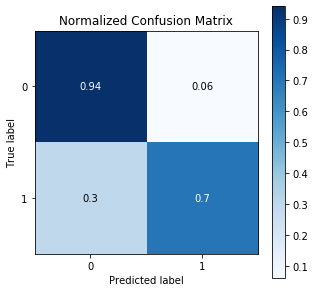

In [163]:
skplt.metrics.plot_confusion_matrix(y_test, y_test_pred_ensm, normalize=True)
plt.rcParams['figure.figsize'] = (5, 5)
plt.show()

# Accuracy Comparison Between Models

In [164]:
print ("Accuracy Score : K Means Clustering = ", accuracy_score(y_test, y_test_pred_Kmeans))
print ("Accuracy Score : PCA + Logistic Regression = ", accuracy_score(y_test, y_test_pred_logregpca))
print ("Accuracy Score : PCA + Random Forest Classifier = ", accuracy_score(y_test, y_test_pred_randclf))
print ("Accuracy Score : PCA + XGBoost Classifier = ", accuracy_score(y_test, y_test_pred_xgb))
print ("Accuracy Score : PCA + Tuned XGBoost Classifier = ", accuracy_score(y_test, y_test_pred_tuned_xgb))
print ("Accuracy Score : K-nearest neighbors = ", accuracy_score(y_test_knn, y_test_pred_knn))
print ("Accuracy Score : Ensemble Model = ", accuracy_score(y_test, y_test_pred_ensm))

Accuracy Score : K Means Clustering =  0.5994776034103946
Accuracy Score : PCA + Logistic Regression =  0.8938739051473421
Accuracy Score : PCA + Random Forest Classifier =  0.8738374135865447
Accuracy Score : PCA + XGBoost Classifier =  0.8947163437318759
Accuracy Score : PCA + Tuned XGBoost Classifier =  0.8984120667685496
Accuracy Score : K-nearest neighbors =  0.8631924096553648
Accuracy Score : Ensemble Model =  0.8958254839788501


In [114]:
print ("Accuracy Score : K Means Clustering = ", accuracy_score(y_test, y_test_pred_Kmeans))
print ("Accuracy Score : PCA + Logistic Regression = ", accuracy_score(y_test, y_test_pred_logregpca))
print ("Accuracy Score : PCA + Random Forest Classifier = ", accuracy_score(y_test, y_test_pred_randclf))
print ("Accuracy Score : PCA + XGBoost Classifier = ", accuracy_score(y_test, y_test_pred_xgb))
#print ("Accuracy Score : PCA + Tuned XGBoost Classifier = ", accuracy_score(y_test, y_test_pred_tuned_xgb))
print ("Accuracy Score : K-nearest neighbors = ", accuracy_score(y_test_knn, y_test_pred_knn))
print ("Accuracy Score : Ensemble Model = ", accuracy_score(y_test, y_test_pred_ensm))

Accuracy Score : K Means Clustering =  0.5994776034103946
Accuracy Score : PCA + Logistic Regression =  0.8938739051473421
Accuracy Score : PCA + Random Forest Classifier =  0.8738374135865447
Accuracy Score : PCA + XGBoost Classifier =  0.8947163437318759
Accuracy Score : K-nearest neighbors =  0.8631924096553648
Accuracy Score : Ensemble Model =  0.8938485049890145


In [165]:
print ("No. of Correct Predictions : K Means Clustering = ", (y_test == y_test_pred_Kmeans).value_counts()[1])
print ("No. of Correct Predictions : PCA + Logistic Regression = ", (y_test == y_test_pred_logregpca).value_counts()[1])
print ("No. of Correct Predictions : PCA + Random Forest Classifier = ", (y_test == y_test_pred_randclf).value_counts()[1])
print ("No. of Correct Predictions : PCA + XGBoost Classifier = ", (y_test == y_test_pred_xgb).value_counts()[1])
print ("No. of Correct Predictions : PCA + Tuned XGBoost Classifier = ", (y_test == y_test_pred_tuned_xgb).value_counts()[1])
print ("No. of Correct Predictions : K-nearest neighbors = ", (y_test_knn == y_test_pred_knn).value_counts()[1])
print ("No. of Correct Predictions : Ensemble Model = ", (y_test == y_test_pred_ensm).value_counts()[1])

No. of Correct Predictions : K Means Clustering =  141608
No. of Correct Predictions : PCA + Logistic Regression =  211150
No. of Correct Predictions : PCA + Random Forest Classifier =  206417
No. of Correct Predictions : PCA + XGBoost Classifier =  211349
No. of Correct Predictions : PCA + Tuned XGBoost Classifier =  212222
No. of Correct Predictions : K-nearest neighbors =  24746
No. of Correct Predictions : Ensemble Model =  211611


In [166]:
print ("RMSE : K Means Clustering = ", np.sqrt(mean_squared_error(y_test, y_test_pred_Kmeans)))
print ("RMSE : PCA + Logistic Regression = ", np.sqrt(mean_squared_error(y_test, y_test_pred_logregpca)))
print ("RMSE : PCA + Random Forest Classifier = ", np.sqrt(mean_squared_error(y_test, y_test_pred_randclf)))
print ("RMSE : PCA + XGBoost Classifier = ", np.sqrt(mean_squared_error(y_test, y_test_pred_xgb)))
print ("RMSE : PCA + Tuned XGBoost Classifier = ", np.sqrt(mean_squared_error(y_test, y_test_pred_tuned_xgb)))
print ("RMSE : K-nearest neighbors = ", np.sqrt(mean_squared_error(y_test_knn, y_test_pred_knn)))
print ("RMSE : Ensemble Model = ", np.sqrt(mean_squared_error(y_test, y_test_pred_ensm)))

RMSE : K Means Clustering =  0.6328683880473138
RMSE : PCA + Logistic Regression =  0.32577000299698855
RMSE : PCA + Random Forest Classifier =  0.3551937308194717
RMSE : PCA + XGBoost Classifier =  0.32447443083873967
RMSE : PCA + Tuned XGBoost Classifier =  0.31872862003819247
RMSE : K-nearest neighbors =  0.36987510100659
RMSE : Ensemble Model =  0.3227607721225581


In [192]:
from sklearn import metrics
models = [
    {
        'label' : 'Kmeans',
        'y_act' : y_test,
        'y_hat': y_test_pred_Kmeans               
    },
    {
        'label' : 'Logistic Regression',
        'y_act' : y_test,
        'y_hat': y_test_pred_logregpca      
    },
    {
        'label' : 'Random Forest Classifier',
        'y_act' : y_test,
        'y_hat': y_test_pred_randclf        
    },    
    {
        'label' : 'XGB Classifier',
        'y_act' : y_test,
        'y_hat': y_test_pred_xgb        
    },
    {
        'label' : 'Tuned XGB Classifier',
        'y_act' : y_test,
        'y_hat': y_test_pred_tuned_xgb        
    }, 
    {
        'label' : 'Ensemble',
        'y_act' : y_test,
        'y_hat': y_test_pred_ensm        
    },
    {
        'label' : 'KNN',
        'y_act' : y_test_knn,
        'y_hat': y_test_pred_knn               
    }
]


<Figure size 360x360 with 0 Axes>

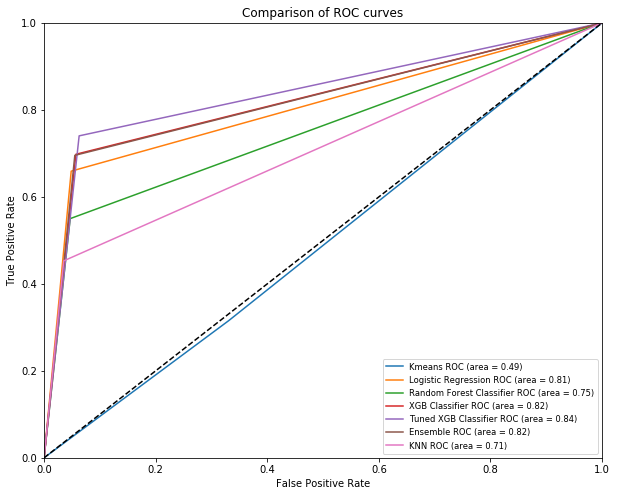

In [193]:
from sklearn.metrics import roc_curve, auc

plt.clf()
plt.figure(figsize=(10,8))
for m in models:
    y_act = m['y_act']
    probas = m['y_hat']
    fpr, tpr, thresholds = roc_curve(y_act, probas)
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.title('Comparison of ROC curves')
plt.show()

<Figure size 1440x1440 with 0 Axes>

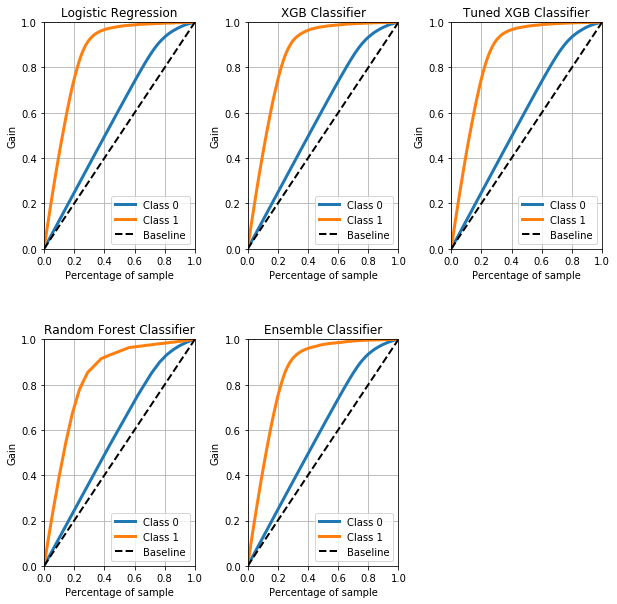

In [199]:
plt.figure(figsize=(20,20))
fig, axs = plt.subplots(2, 3, figsize=(10,10))

skplt.metrics.plot_cumulative_gain(y_test, log_reg_pca.predict_proba(X_trans_test), ax=axs[0, 0], title='Logistic Regression')
skplt.metrics.plot_cumulative_gain(y_test, xgb_clf.predict_proba(X_trans_test), ax=axs[0, 1], title='XGB Classifier')
skplt.metrics.plot_cumulative_gain(y_test, tuned_xgb_clf.predict_proba(X_trans_test), ax=axs[0, 2], title='Tuned XGB Classifier')
skplt.metrics.plot_cumulative_gain(y_test, Rand_clf.predict_proba(X_trans_test), ax=axs[1, 0], title='Random Forest Classifier')
skplt.metrics.plot_cumulative_gain(y_test, en_clf.predict_proba(X_trans_test), ax=axs[1, 1], title='Ensemble Classifier')
fig.delaxes(axs[1][2])

plt.subplots_adjust(hspace=0.40, wspace=0.35)

<Figure size 1440x1440 with 0 Axes>

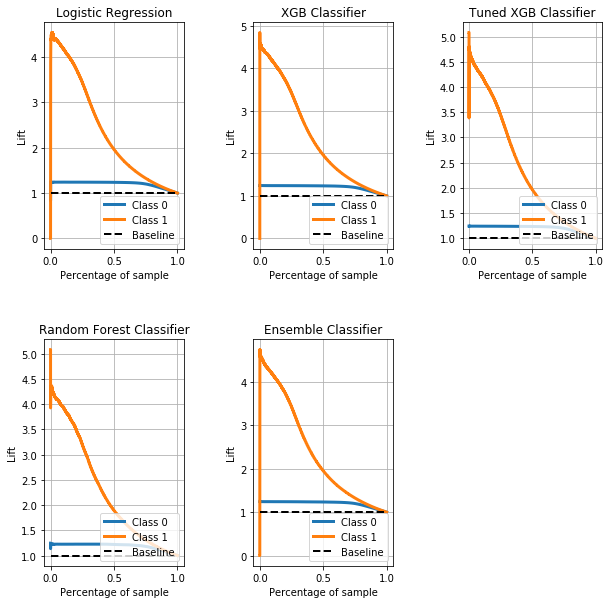

In [200]:
plt.figure(figsize=(20,20))
fig, axs = plt.subplots(2, 3, figsize=(10,10))

skplt.metrics.plot_lift_curve(y_test, log_reg_pca.predict_proba(X_trans_test), ax=axs[0, 0], title='Logistic Regression')
skplt.metrics.plot_lift_curve(y_test, xgb_clf.predict_proba(X_trans_test), ax=axs[0, 1], title='XGB Classifier')
skplt.metrics.plot_lift_curve(y_test, tuned_xgb_clf.predict_proba(X_trans_test), ax=axs[0, 2], title='Tuned XGB Classifier')
skplt.metrics.plot_lift_curve(y_test, Rand_clf.predict_proba(X_trans_test), ax=axs[1, 0], title='Random Forest Classifier')
skplt.metrics.plot_lift_curve(y_test, en_clf.predict_proba(X_trans_test), ax=axs[1, 1], title='Ensemble Classifier')
fig.delaxes(axs[1][2])

plt.subplots_adjust(hspace=0.40, wspace=0.50)

In [ ]:
# Closer the Precision Recall Curve to the upper right corner, better the prediction
# The AUC scores were better for XGB over LogReg, but the PRC curve is slightly better for LogReg (for Class=1) - this could be due to the highly imbalanced dataset
plt.figure(figsize=(20,20))
fig, axs = plt.subplots(2, 3, figsize=(14,14))

skplt.metrics.plot_precision_recall(y_test, log_reg_pca.predict_proba(X_trans_test), ax=axs[0, 0], title='Logistic Regression')
skplt.metrics.plot_precision_recall(y_test, xgb_clf.predict_proba(X_trans_test), ax=axs[0, 1], title='XGB Classifier')
skplt.metrics.plot_precision_recall(y_test, tuned_xgb_clf.predict_proba(X_trans_test), ax=axs[0, 2], title='Tuned XGB Classifier')
skplt.metrics.plot_precision_recall(y_test, Rand_clf.predict_proba(X_trans_test), ax=axs[1, 0], title='Random Forest Classifier')
skplt.metrics.plot_precision_recall(y_test, en_clf.predict_proba(X_trans_test), ax=axs[1, 1], title='Ensemble Classifier')
skplt.metrics.plot_precision_recall(y_test, kNN.predict(X_trans_test_knn), ax=axs[1, 2], title='KNN Classifier')
#fig.delaxes(axs[1][2])

plt.subplots_adjust(hspace=0.40, wspace=0.70)

#### Holdout Set
Final model select for use was the X model due to the highest accuracy score and the least amount of false positives in a confusion matrix

In [196]:
y_holdout_pred_tuned_xgb = tuned_xgb_clf.predict(X_trans_holdout)
print(accuracy_score(y_holdout, y_holdout_pred_tuned_xgb)) 
print(roc_auc_score(y_holdout, y_holdout_pred_tuned_xgb)) 

0.895462684292735
0.8310901345270153


In [174]:
y_holdout_pred_ensm= en_clf.predict(X_trans_holdout)
accuracy_score(y_holdout, y_holdout_pred_ensm)
#y_holdout_proba_pred_ensm = en_clf.predict_proba(X_trans_holdout)

0.8947769438835765

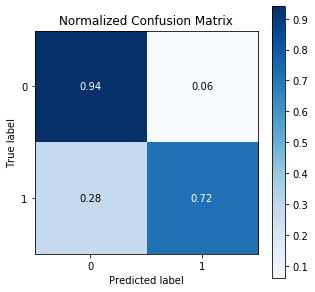

In [184]:
skplt.metrics.plot_confusion_matrix(y_holdout, y_holdout_pred_tuned_xgb, normalize=True)
plt.rcParams['figure.figsize'] = (5, 5)
plt.show()

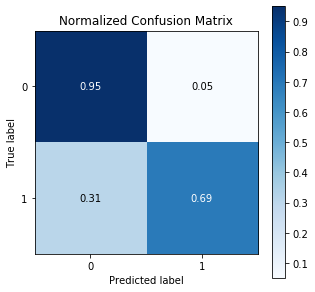

In [183]:
skplt.metrics.plot_confusion_matrix(y_holdout, y_holdout_pred_ensm, normalize=True)
plt.rcParams['figure.figsize'] = (5, 5)
plt.show()

In [ ]:
print ("Accuracy Score : Ensemble = ", accuracy_score(y_holdout, y_holdout_pred_ensm))

In [ ]:
print ("No. of Correct Predictions : K-nearest neighbors = ", (y_holdout == y_holdout_pred_ensm).value_counts()[1])

In [ ]:
print ("RMSE : Ensemble = ", np.sqrt(mean_squared_error(y_holdout, y_holdout_pred_ensm)))

In [0]:
#from sklearn.metrics import log_loss
#log_loss(y_test, y_test_pred_ensm)

#### Producing Predicted Values for Holdout Set

In [29]:
#Untransformed values from holdout set

X_holdout_untransformed.shape

(26249, 62)

In [191]:
#y_holdout_pred_ensm = pd.DataFrame(y_holdout_pred_ensm, columns = ['predicted_y'])
predicted_df = pd.concat([X_holdout_untransformed,pd.DataFrame(y_holdout_pred_tuned_xgb)], axis = 1)
predicted_df = predicted_df.rename(columns = {0:'predicted_y'})
predicted_df.to_csv('predicted_df.csv', index = False)
predicted_df

loan_amount home_ownership  annual_income verification_status  \
0              NaN            NaN            NaN                 NaN   
1          28000.0       MORTGAGE       78312.00            Verified   
2          30000.0       MORTGAGE      160000.00     Source Verified   
3           6000.0           RENT       44000.00        Not Verified   
4           9600.0       MORTGAGE       60000.00        Not Verified   
5          37000.0           RENT      115000.00            Verified   
6              NaN            NaN            NaN                 NaN   
7           7125.0       MORTGAGE       21000.00            Verified   
8          28800.0           RENT       81000.00            Verified   
9              NaN            NaN            NaN                 NaN   
10             NaN            NaN            NaN                 NaN   
11             NaN            NaN            NaN                 NaN   
12             NaN            NaN            NaN                 NaN   
13             NaN            NaN            NaN                 NaN   
14         13475.0       MORTGAGE       70000.00     Source Verified   
15         35000.0       MORTGAGE      125000.00            Verified   
16             NaN            NaN            NaN                 NaN   
17          9075.0           RENT       54600.00        Not Verified   
18             NaN            NaN            NaN                 NaN   
19             NaN            NaN            NaN                 NaN   
20          6075.0           RENT       30000.00     Source Verified   
21         18000.0           RENT       65000.00     Source Verified   
22             NaN            NaN            NaN                 NaN   
23         25000.0       MORTGAGE      100000.00     Source Verified   
24         12000.0            OWN       75000.00     Source Verified   
25             NaN            NaN            NaN                 NaN   
26             NaN            NaN            NaN                 NaN   
27             NaN            NaN            NaN                 NaN   
28         15000.0       MORTGAGE       45036.00            Verified   
29          2500.0       MORTGAGE       21834.72        Not Verified   
30         11200.0            OWN       60000.00            Verified   
31         15000.0           RENT       75000.00     Source Verified   
32         21000.0           RENT       88000.00     Source Verified   
33          2000.0           RENT       33000.00     Source Verified   
34             NaN            NaN            NaN                 NaN   
35             NaN            NaN            NaN                 NaN   
36         11000.0       MORTGAGE      105000.00            Verified   
37             NaN            NaN            NaN                 NaN   
38             NaN            NaN            NaN                 NaN   
39          8000.0            OWN       35000.00     Source Verified   
40          4800.0           RENT       26500.00     Source Verified   
41          8000.0           RENT       80000.00     Source Verified   
42             NaN            NaN            NaN                 NaN   
43             NaN            NaN            NaN                 NaN   
44         15000.0       MORTGAGE       65000.00        Not Verified   
45         20000.0           RENT       65000.00            Verified   
46             NaN            NaN            NaN                 NaN   
47         16000.0            OWN       42000.00        Not Verified   
48         12000.0       MORTGAGE       90000.00        Not Verified   
49         25000.0       MORTGAGE       81000.00            Verified   
50             NaN            NaN            NaN                 NaN   
51          8400.0           RENT       48000.00            Verified   
52             NaN            NaN            NaN                 NaN   
53          9375.0           RENT       63000.00     Source Verified   
54          4000.0           RENT       50000.0